###### importing libraries which I need

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_set.csv" , sep=";")



In [3]:
df.shape

(110527, 14)

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df[df['Age']==-1]
df.drop(99832 , axis = 0 , inplace = True)

In [9]:
df.duplicated(subset=['PatientId', 'No-show']).sum()


39174

In [10]:
df = df.drop_duplicates(subset=['PatientId', 'No-show'])
df.shape

(71352, 14)

In [15]:
# df.drop(["PatientId" , "AppointmentID" , "ScheduledDay" , "AppointmentDay"] , axis = 1 , inplace = True)
df.shape

(71352, 10)

In [12]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.rename(columns = {'No-show' : 'No_show'} , inplace = True)
df


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [16]:
df.loc[df['No_show'] == 'Yes', 'No_show'] = 1
df.loc[df['No_show'] == 'No', 'No_show'] = 0
df['No_show'] = df['No_show'].astype(int)

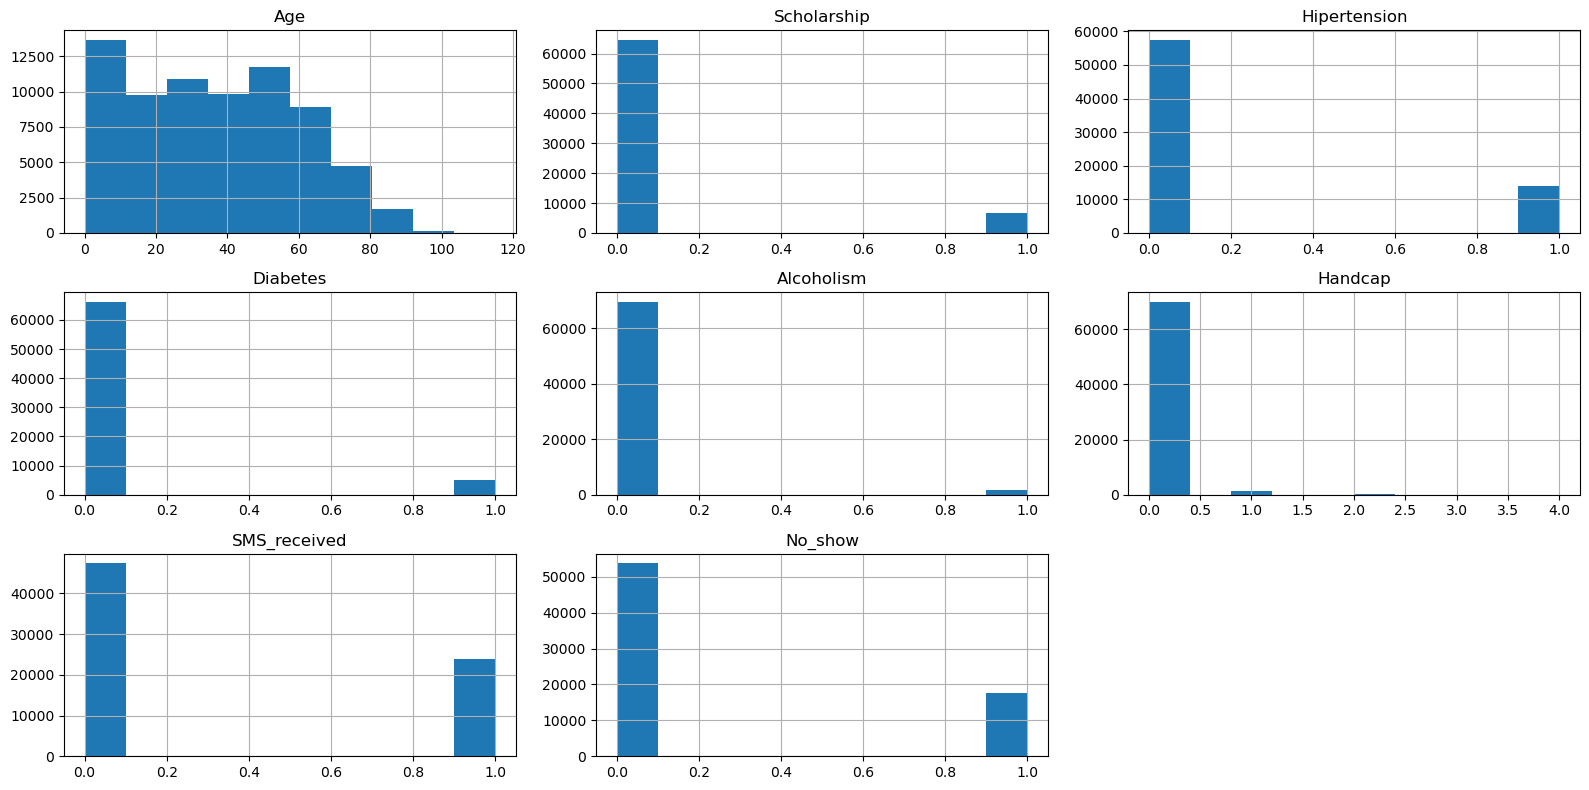

In [18]:
df.hist(figsize = (16 , 8))
plt.tight_layout()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71352 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         71352 non-null  object
 1   Age            71352 non-null  int64 
 2   Neighbourhood  71352 non-null  object
 3   Scholarship    71352 non-null  int64 
 4   Hipertension   71352 non-null  int64 
 5   Diabetes       71352 non-null  int64 
 6   Alcoholism     71352 non-null  int64 
 7   Handcap        71352 non-null  int64 
 8   SMS_received   71352 non-null  int64 
 9   No_show        71352 non-null  int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 5.7+ MB


In [60]:
df_NO_show = df[df['No_show']==1]
df_show = df[df['No_show']==0]

In [69]:
df_show.mean(),df_NO_show.mean()

C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\2691734135.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_show.mean(),df_NO_show.mean()
C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\2691734135.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_show.mean(),df_NO_show.mean()


(Age             37.224232
 Scholarship      0.091346
 Hipertension     0.203090
 Diabetes         0.072846
 Alcoholism       0.023655
 Handcap          0.020789
 SMS_received     0.297171
 No_show          0.000000
 dtype: float64,
 Age             34.389683
 Scholarship      0.108274
 Hipertension     0.171036
 Diabetes         0.065089
 Alcoholism       0.029509
 Handcap          0.017819
 SMS_received     0.453184
 No_show          1.000000
 dtype: float64)

In [75]:
df_show.count(),df_NO_show.count()

(Gender           53730
 Age              53730
 Neighbourhood    53730
 Scholarship      53730
 Hipertension     53730
 Diabetes         53730
 Alcoholism       53730
 Handcap          53730
 SMS_received     53730
 No_show          53730
 dtype: int64,
 Gender           17622
 Age              17622
 Neighbourhood    17622
 Scholarship      17622
 Hipertension     17622
 Diabetes         17622
 Alcoholism       17622
 Handcap          17622
 SMS_received     17622
 No_show          17622
 dtype: int64)

In [139]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


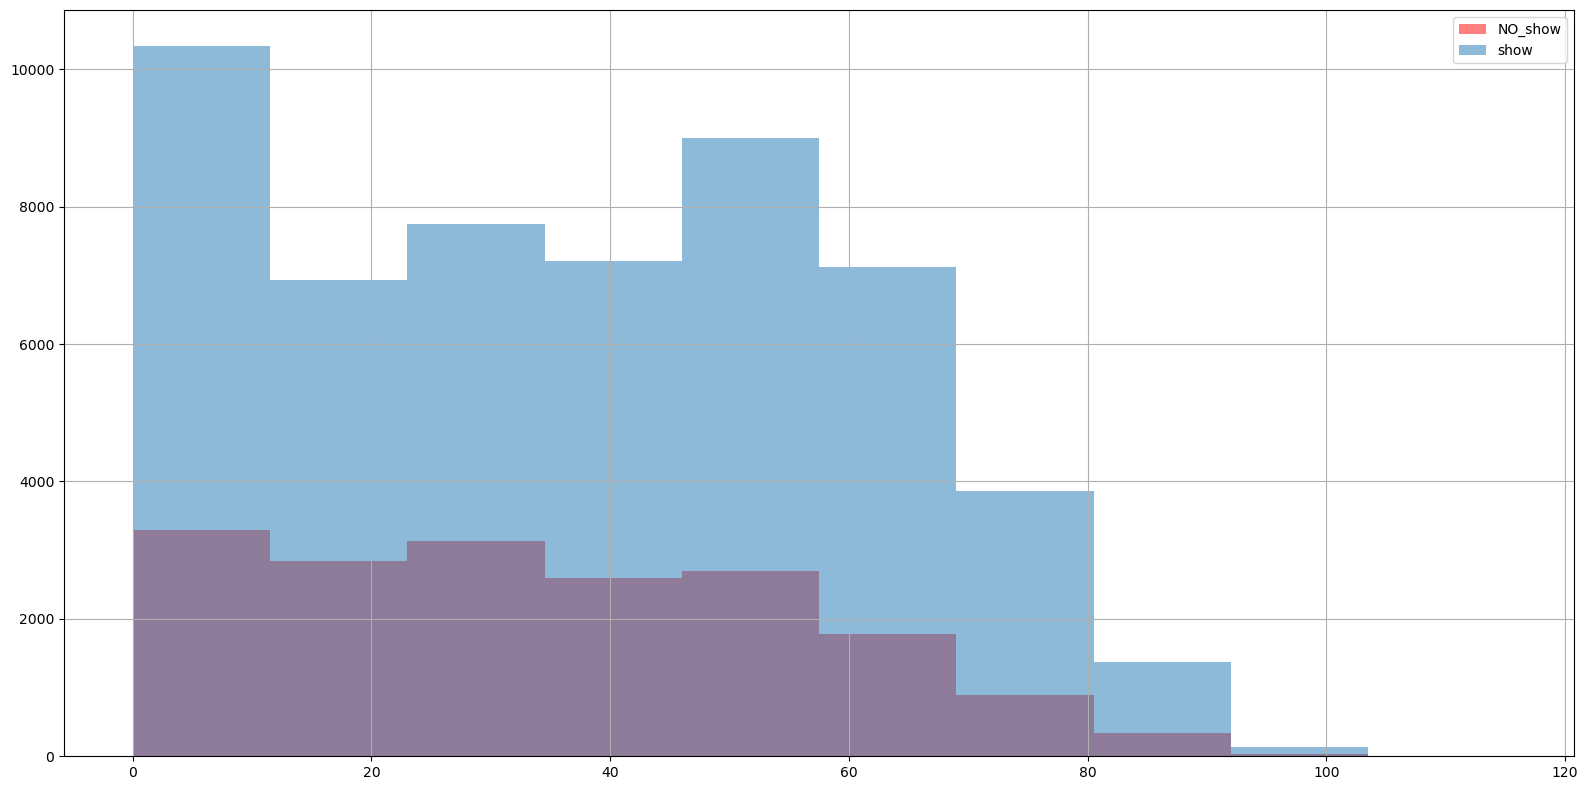

In [74]:
df_NO_show['Age'].hist(figsize = (16 , 8) , alpha = 0.5  , color = 'r', label = "NO_show")
df_show['Age'].hist(figsize = (16 , 8)  , alpha = 0.5  , label = "show")
plt.legend()
plt.tight_layout()

C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\2091865970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_show.groupby(['Diabetes' , 'Hipertension' ]).mean()['Age'].plot(kind = 'bar' , label = 'show' , color = '#7ec7c6' )
C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\2091865970.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_NO_show.groupby(['Diabetes' , 'Hipertension']).mean()['Age'].plot(kind = 'bar'  , color = '#b08bb8' , label = 'no_show')


Text(0, 0.5, 'mean age')

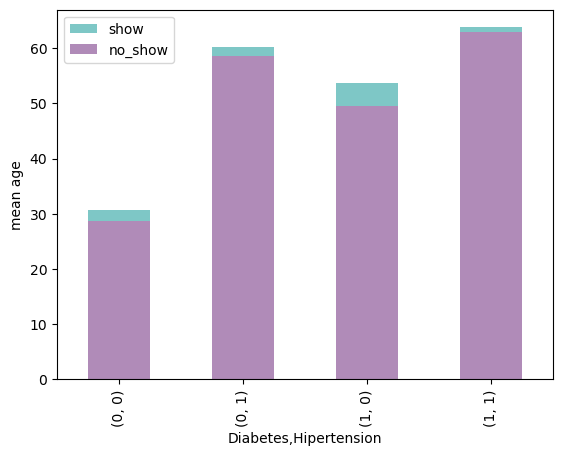

In [101]:
df_show.groupby(['Diabetes' , 'Hipertension' ]).mean()['Age'].plot(kind = 'bar' , label = 'show' , color = '#7ec7c6' )
df_NO_show.groupby(['Diabetes' , 'Hipertension']).mean()['Age'].plot(kind = 'bar'  , color = '#b08bb8' , label = 'no_show')
plt.legend()
plt.ylabel('mean age')

In [140]:
df_show.groupby(['Diabetes' , 'Hipertension' ]).mean()['Age'],df_NO_show.groupby(['Diabetes' , 'Hipertension']).mean()['Age']

C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\1493301681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_show.groupby(['Diabetes' , 'Hipertension' ]).mean()['Age'],df_NO_show.groupby(['Diabetes' , 'Hipertension']).mean()['Age']
C:\Users\atefwin10\AppData\Local\Temp\ipykernel_8960\1493301681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_show.groupby(['Diabetes' , 'Hipertension' ]).mean()['Age'],df_NO_show.groupby(['Diabetes' , 'Hipertension']).mean()['Age']


(Diabetes  Hipertension
 0         0               30.699658
           1               60.274728
 1         0               53.680441
           1               63.774780
 Name: Age, dtype: float64,
 Diabetes  Hipertension
 0         0               28.778133
           1               58.650047
 1         0               49.481172
           1               62.950441
 Name: Age, dtype: float64)

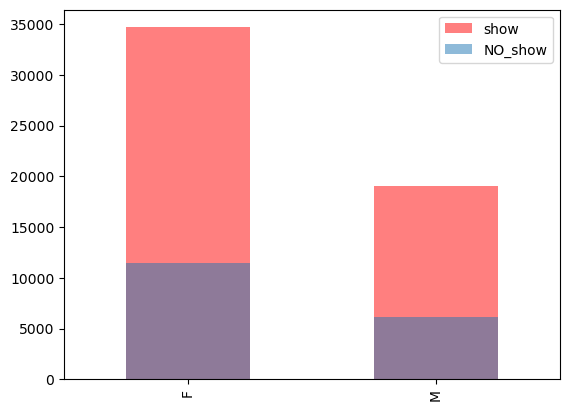

In [133]:
df_show['Gender'].value_counts().plot(kind = 'bar' , color = 'r' , alpha = 0.5 , label = 'show')
df_NO_show['Gender'].value_counts().plot(kind = 'bar' , alpha = 0.5 , label = 'NO_show')
plt.legend()

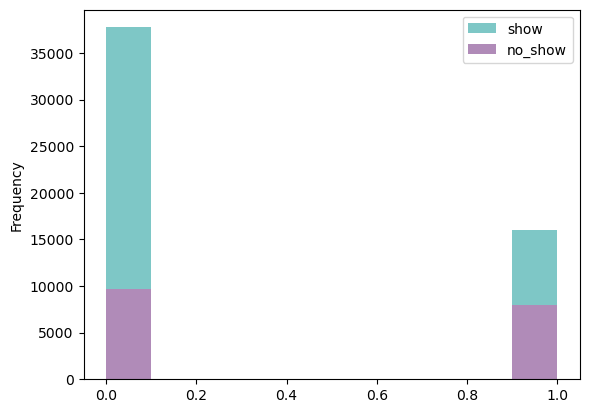

In [138]:
df_show['SMS_received'].plot(kind = 'hist' , label = 'show' , color = '#7ec7c6' )
df_NO_show['SMS_received'].plot(kind = 'hist'  , color = '#b08bb8' , label = 'no_show')
plt.legend()

Text(0, 0.5, 'patient number')

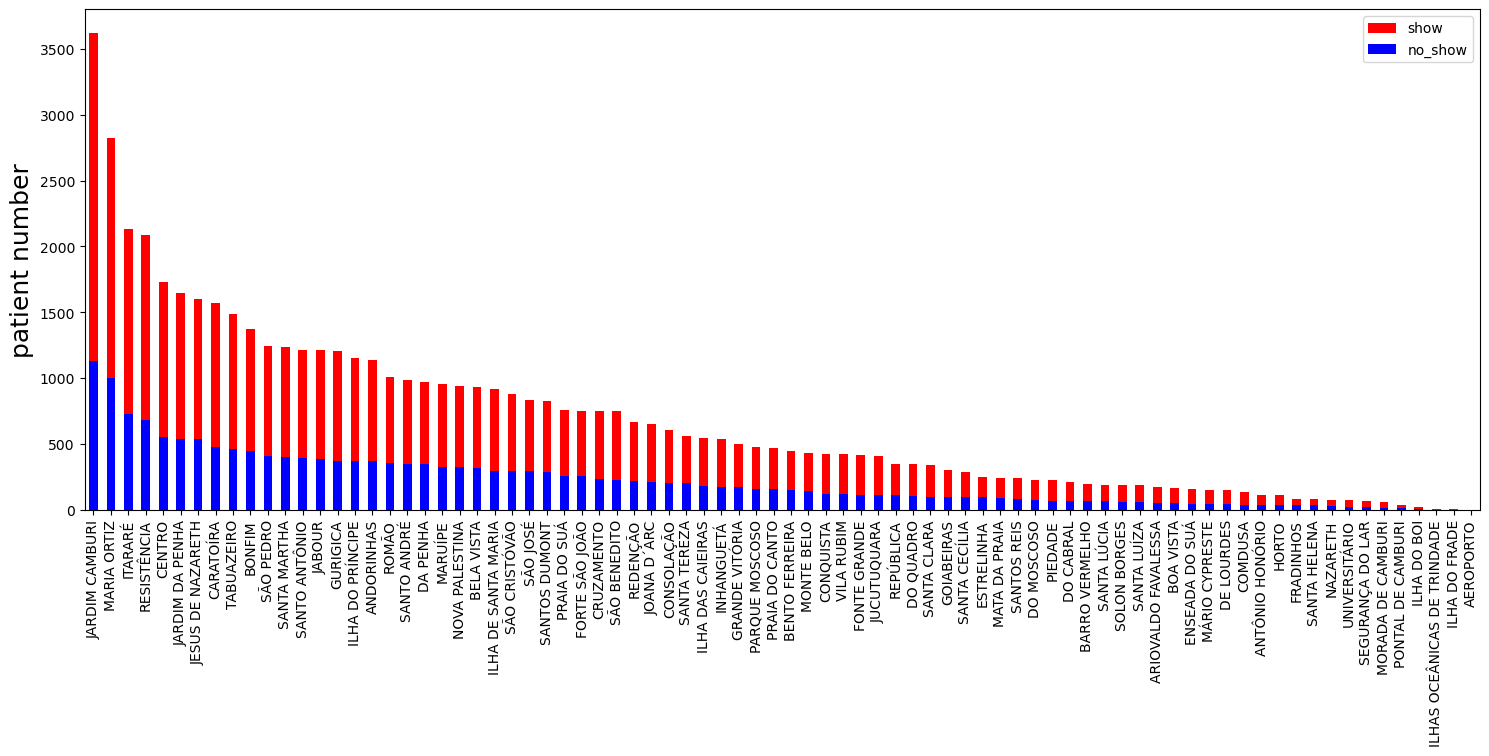

In [155]:
# Neighbourhood
plt.figure(figsize=(18, 6.5))
df_show['Neighbourhood'].value_counts().plot(kind = 'bar' , label = 'show' , color = 'r' )
df_NO_show['Neighbourhood'].value_counts().plot(kind = 'bar'  , color = 'b' , label = 'no_show' )
plt.legend()
plt.ylabel('patient number' , fontsize= 18)

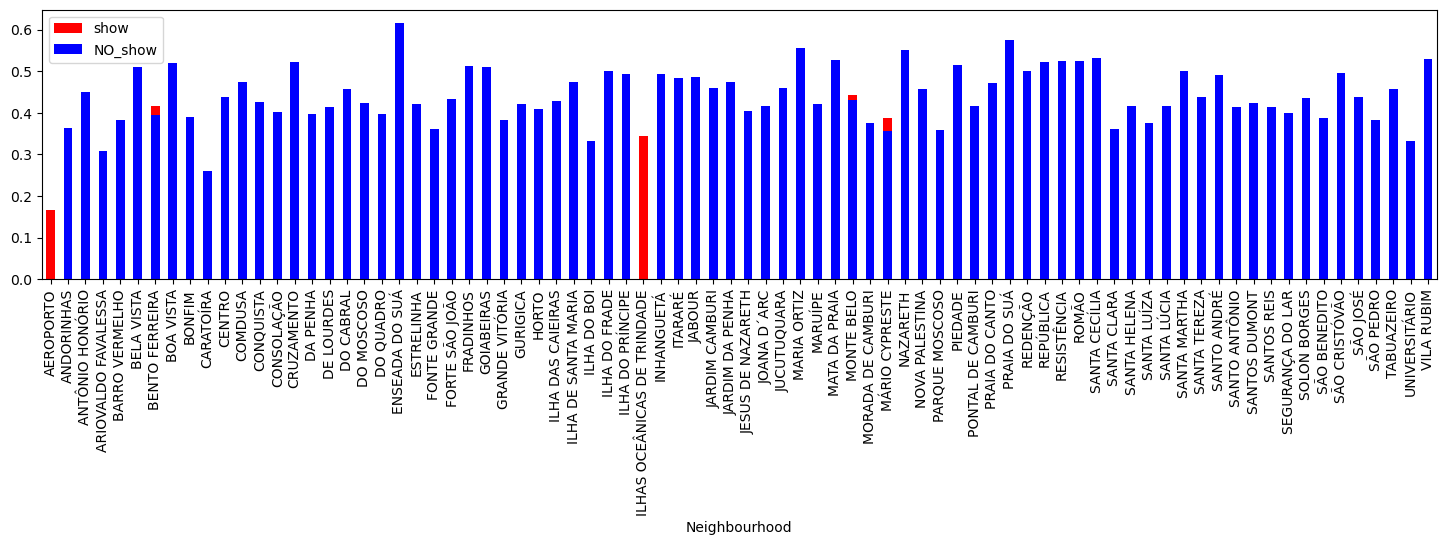

In [176]:
plt.figure(figsize=(18, 3.5))
df_show.groupby('Neighbourhood')['SMS_received'].mean().plot(kind = 'bar' , label = 'show' , color = 'r' )
df_NO_show.groupby('Neighbourhood')['SMS_received'].mean().plot(kind = 'bar' , label = 'NO_show' , color = 'b' )
plt.legend()